In [1]:
#імпорт бібліотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
#завантаження даних
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [3]:
#знаходження кількості рядків/колонок(полів) у обох датасетах
test_data.shape , train_data.shape

((13228, 51), (30860, 52))

У test - 13228 записів, 51 - полів (без target), train - відповідно 30860 записів тв 52 колонки

Глянемо на випадкові 10 записів з обох датасетів

In [4]:
test_data.sample(10)

Id  Week        V1   V2        V3        V4        V5  \
4054  -5842100027030418357     2  0.153846  3.0  0.000000  0.106483  0.000000   
11035  3731889265142007075     3  0.000000  0.0  0.108489  0.075906  0.010119   
4420  -1897194997675872701     0  0.052632  1.0  0.041667  0.008065  0.000000   
12227 -7706540198680410681     3  0.051282  1.0  0.020032  0.035256  0.000000   
5695  -8987789600148387610     3  0.225806  2.0       NaN       NaN       NaN   
12232 -5517561509761394272     0  0.256410  4.0       NaN       NaN       NaN   
6088   2665970886572621398     0  0.105263  3.0  0.000000  0.010870  0.048234   
10662  2117853658762711075     2  0.000000  0.0       NaN       NaN       NaN   
4239  -1204272604861418012     3  0.166667  4.0  0.013514  0.041104  0.000000   
1895   4824179948578510471     3  0.000000  0.0  0.005208  0.050614  0.013021   

             V6        V7        V8  ...           P18        P19   P20  \
4054   0.000000  0.796687  0.000000  ...   4419.909091  14.783333  5.00   
11035  0.013768  0.154115  0.165864  ...  17668.695652  44.183333  4.89   
4420   0.000000  0.254877  0.056068  ...   8346.666667  11.666667  5.00   
12227  0.000000  0.082212  0.113862  ...  12070.466667  14.516667  4.89   
5695        NaN       NaN       NaN  ...  20805.000000  42.066667  4.99   
12232       NaN       NaN       NaN  ...   9143.000000   2.533333  4.74   
6088   0.000000  0.070612  0.221787  ...  12479.125000  13.250000  4.93   
10662       NaN       NaN       NaN  ...  11728.026549  15.083333  4.89   
4239   0.000000  0.217436  0.144895  ...  10866.108108  23.516667  4.99   
1895   0.000000  0.292268  0.071247  ...  16241.807692  23.466667  4.77   

             P21    P22      P23       P24       P25     P26       P27  
4054    6.849612  218.0  0.00000  5.000000  0.325581  1912.0  0.045455  
11035  11.278986  362.0  0.00000  4.886304  0.869565  2910.0  0.782609  
4420    6.655556  227.0  0.00000  5.000000  0.166667  2370.0  0.166667  
12227   9.591111  293.0  0.00000  4.890000  0.533333  3721.0  0.200000  
5695   10.792857  505.0  0.02381  4.990000  0.571429  4224.0  0.857143  
12232   2.533333  143.0  0.00000  4.740000  0.000000  9143.0  0.000000  
6088    7.594792  409.0  0.06250  4.920000  0.687500  2364.0  0.750000  
10662   6.637316  250.0  0.00000  4.878673  0.575221  1274.0  0.389381  
4239    8.606306  311.0  0.00000  4.990000  0.000000   959.0  0.351351  
1895   10.602564  445.0  0.00000  4.770000  0.576923  3539.0  0.461538  

[10 rows x 51 columns]

In [5]:
train_data.sample(10)

Id  Week        V1   V2        V3        V4        V5  \
5302  -2649781802879567365     2  0.000000  0.0  0.000000  0.070499  0.000000   
6038  -1471171189995679517     2  0.000000  0.0  0.016685  0.043174  0.008065   
11705  -475141062083562699     1  0.162162  2.0       NaN       NaN       NaN   
18785  2355795048455759496     1  0.051282  2.0  0.020525  0.065476  0.011905   
4557   5600402658394290270     1  0.025641  1.0  0.086806  0.000000  0.000000   
925   -3067985640334689862     1  0.000000  0.0  0.000000  0.003846  0.000000   
29192  -323163380122284935     0  0.051282  1.0  0.000000  0.000000  0.000000   
4333   6143656237531507625     1  0.416667  5.0  0.065665  0.076837  0.000000   
14721  2468682928925458641     1  0.166667  5.0  0.036330  0.073790  0.000000   
30773  6889036560737967294     1  0.051282  1.0  0.014423  0.097020  0.049296   

             V6        V7        V8  ...        P19   P20        P21    P22  \
5302   0.000000  0.072979  0.050401  ...  31.850000  4.98   9.647794  221.0   
6038   0.000000  0.273018  0.153336  ...  11.733333  4.99   6.410215  689.0   
11705       NaN       NaN       NaN  ...  18.266667  4.82   9.973333  212.0   
18785  0.000000  0.218042  0.251704  ...  13.400000  4.96   5.830556  311.0   
4557   0.000000  0.384259  0.199074  ...  24.950000  4.90  10.198611  279.0   
925    0.000000  0.070671  0.072788  ...  37.200000  4.96   7.753636  232.0   
29192  0.000000  0.007714  0.017532  ...  10.166667  4.79   6.176667  196.0   
4333   0.000000  0.112960  0.047891  ...  22.533333  5.00   7.613456  263.0   
14721  0.000000  0.347186  0.180389  ...  29.266667  4.94   9.651366  210.0   
30773  0.007715  0.293712  0.064047  ...  17.816667  4.93  10.583333  378.0   

            P23       P24       P25     P26       P27  target  
5302   0.000000  4.980000  0.029412  1152.0  0.147059     0.0  
6038   0.032258  4.990000  0.516129   620.0  0.354839     0.0  
11705  0.000000  4.820000  0.950000  3250.0  0.263158     1.0  
18785  0.000000  4.960000  0.333333  1556.0  0.166667     0.0  
4557   0.000000  4.878750  0.875000  5257.0  0.541667     0.0  
925    0.000000  4.960000  0.745455  1434.0  0.185185     0.0  
29192  0.000000  4.785600  0.520000  1353.0  0.040000     0.0  
4333   0.000000  4.990550  0.000000  1718.0  0.247706     0.0  
14721  0.000000  4.914918  0.918033  3348.0  0.131148     0.0  
30773  0.000000  4.930000  0.250000  7765.0  0.375000     0.0  

[10 rows x 52 columns]

In [6]:
#перевірка відповідності типів даних
train_data.dtypes

Id          int64
Week        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
P1        float64
P2        float64
P3        float64
P4        float64
P5        float64
P6        float64
P7        float64
P8        float64
P9        float64
P10       float64
P11       float64
P12       float64
P13       float64
P14       float64
P15       float64
P16       float64
P17       float64
P18       float64
P19       float64
P20       float64
P21       float64
P22       float64
P23       float64
P24       float64
P25       float64
P26       float64
P27       float64
target    float64
dtype: object

In [7]:
#перевірка відповідності типів даних (тільки для test) 
test_data.dtypes

Id        int64
Week      int64
V1      float64
V2      float64
V3      float64
V4      float64
V5      float64
V6      float64
V7      float64
V8      float64
V9      float64
V10     float64
V11     float64
V12     float64
V13     float64
V14     float64
V15     float64
V16     float64
V17     float64
V18     float64
V19     float64
V20     float64
V21     float64
V22     float64
P1      float64
P2      float64
P3      float64
P4      float64
P5      float64
P6      float64
P7      float64
P8      float64
P9      float64
P10     float64
P11     float64
P12     float64
P13     float64
P14     float64
P15     float64
P16     float64
P17     float64
P18     float64
P19     float64
P20     float64
P21     float64
P22     float64
P23     float64
P24     float64
P25     float64
P26     float64
P27     float64
dtype: object

In [8]:
#null
train_data.isna().sum()

Id           0
Week         0
V1          48
V2          48
V3        7100
V4        7100
V5        7100
V6        7100
V7        7100
V8        7100
V9        7100
V10       7100
V11       7100
V12       7100
V13       7100
V14       7100
V15       7100
V16       7100
V17       7100
V18       7100
V19       7100
V20       7100
V21       7100
V22       7100
P1        2914
P2        2914
P3        2913
P4        2913
P5        2914
P6        2914
P7        2914
P8        2913
P9        2913
P10       2914
P11       2914
P12       2914
P13       2914
P14       2849
P15       2914
P16       2914
P17       2913
P18       2914
P19       2913
P20       2914
P21       2913
P22       2914
P23       2913
P24       2914
P25       2913
P26       2914
P27       2914
target       0
dtype: int64

In [9]:
test_data.isna().sum()

Id         0
Week       0
V1        12
V2        12
V3      2952
V4      2952
V5      2952
V6      2952
V7      2952
V8      2952
V9      2952
V10     2952
V11     2952
V12     2952
V13     2952
V14     2952
V15     2952
V16     2952
V17     2952
V18     2952
V19     2952
V20     2952
V21     2952
V22     2952
P1      1212
P2      1212
P3      1211
P4      1211
P5      1212
P6      1212
P7      1212
P8      1211
P9      1211
P10     1212
P11     1212
P12     1212
P13     1212
P14     1179
P15     1212
P16     1212
P17     1211
P18     1212
P19     1211
P20     1212
P21     1211
P22     1212
P23     1211
P24     1212
P25     1211
P26     1212
P27     1212
dtype: int64

Виглядає дивним те, що кількість null у колонках P-номер однакова (або майже однакова). Аналогічно з V-величинами.

Припускаю, що Null виникає або одночасно всюди, або ніде - це б пояснило даний розподіл

In [10]:
test_data[test_data['V1'].isna()]

Id  Week  V1  V2  V3  V4  V5  V6  V7  V8  ...  P18  \
344  -9043009995398659595     0 NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN   
345  -9043009995398659595     1 NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN   
346  -9043009995398659595     2 NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN   
347  -9043009995398659595     3 NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN   
908  -6191270691187860483     0 NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN   
909  -6191270691187860483     1 NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN   
910  -6191270691187860483     2 NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN   
911  -6191270691187860483     3 NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN   
1516  1714104126765297416     0 NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN   
1517  1714104126765297416     1 NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN   
1518  1714104126765297416     2 NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN   
1519  1714104126765297416     3 NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN   

      P19  P20  P21  P22  P23  P24  P25  P26  P27  
344   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
345   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
346   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
347   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
908   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
909   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
910   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
911   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1516  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1517  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1518  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1519  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[12 rows x 51 columns]

От, власне, те що і треба було показати. Усі 12 записів мають лише 2 заповнені колонки

In [11]:
amount_of_elements_match = test_data[test_data['V1'].isna()].isin(test_data[test_data['V3'].isna()])['Id'].sum()
amount_of_elements_match == 12

True

12 записів, показані раніше містяться в даних без V3, V4, ...

In [12]:
amount_of_elements_match = test_data[test_data['V1'].isna()].isin(test_data[test_data['V4'].isna()])['Id'].sum()
amount_of_elements_match == 12

True

Можна повторити це в циклі, але, насправді, ісе і так зрозуміло. 

Якщо V1, V2 - null => V4,V5, ... - null

Для тренувального набору так само, певен

Слід ще глянути на P1, ... , P27. Думаю, що якщо один PI - null, то і усі інші

In [13]:
test_data[test_data['P1'].isna()].count()

Id      1212
Week    1212
V1      1200
V2      1200
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
P1         0
P2         0
P3         1
P4         1
P5         0
P6         0
P7         0
P8         1
P9         1
P10        0
P11        0
P12        0
P13        0
P14       33
P15        0
P16        0
P17        1
P18        0
P19        1
P20        0
P21        1
P22        0
P23        1
P24        0
P25        1
P26        0
P27        0
dtype: int64

Для інших певен, що працює подібне правило. 
Тобто для P1 видно, що інші Pj - nan. Цього досить

In [14]:
#не знаю, що тут можна побачити
train_data.describe()

Id          Week            V1            V2            V3  \
count  3.086000e+04  30860.000000  30812.000000  30812.000000  23760.000000   
mean   5.880459e+16      1.500000      0.086103      1.917175      0.046198   
std    5.305951e+18      1.118052      0.116918      2.962384      0.074886   
min   -9.217316e+18      0.000000      0.000000      0.000000      0.000000   
25%   -4.443360e+18      0.750000      0.000000      0.000000      0.000000   
50%    6.482893e+16      1.500000      0.047619      1.000000      0.020706   
75%    4.655320e+18      2.250000      0.128205      2.000000      0.054194   
max    9.222566e+18      3.000000      0.823529     28.000000      0.806543   

                 V4            V5            V6            V7            V8  \
count  23760.000000  23760.000000  23760.000000  23760.000000  23760.000000   
mean       0.046558      0.010059      0.008308      0.152373      0.111035   
std        0.080221      0.030413      0.049233      0.136181      0.104658   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.002933      0.000000      0.000000      0.050836      0.039541   
50%        0.023266      0.000000      0.000000      0.125738      0.089358   
75%        0.053769      0.007143      0.000000      0.215331      0.150164   
max        0.938948      0.804446      0.862319      0.993363      1.000000   

       ...           P19           P20           P21           P22  \
count  ...  27947.000000  27946.000000  27947.000000  27946.000000   
mean   ...     26.592387      4.944650      9.013416    323.196450   
std    ...     25.158699      0.060288      2.901414    146.382184   
min    ...      0.166667      4.240000      0.141667     48.000000   
25%    ...     15.666667      4.920000      7.479428    223.000000   
50%    ...     20.466667      4.960000      8.477667    290.000000   
75%    ...     30.233333      4.990000      9.835913    390.000000   
max    ...    486.150000      5.000000     71.516667   2049.000000   

                P23           P24           P25            P26           P27  \
count  27947.000000  27946.000000  27947.000000   27946.000000  27946.000000   
mean       0.008797      4.940130      0.492355    3266.263186      0.344434   
std        0.040291      0.063075      0.329794    3144.738593      0.257145   
min        0.000000      4.217500      0.000000       0.000000      0.000000   
25%        0.000000      4.920000      0.184211    1423.000000      0.140187   
50%        0.000000      4.960000      0.530435    2293.000000      0.294118   
75%        0.000000      4.980000      0.780488    3973.750000      0.500000   
max        1.000000      5.000000      1.000000  120092.000000      1.000000   

             target  
count  30860.000000  
mean       0.173169  
std        0.378400  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 52 columns]

In [15]:
test_data.describe()

Id          Week            V1            V2            V3  \
count  1.322800e+04  13228.000000  13216.000000  13216.000000  10276.000000   
mean   1.190799e+17      1.500000      0.085065      1.885291      0.045203   
std    5.267046e+18      1.118076      0.113965      2.850787      0.075277   
min   -9.193688e+18      0.000000      0.000000      0.000000      0.000000   
25%   -4.372960e+18      0.750000      0.000000      0.000000      0.000000   
50%    1.694073e+17      1.500000      0.050641      1.000000      0.020749   
75%    4.634222e+18      2.250000      0.128205      2.000000      0.053520   
max    9.221450e+18      3.000000      0.648649     24.000000      0.948026   

                 V4            V5            V6            V7            V8  \
count  10276.000000  10276.000000  10276.000000  10276.000000  10276.000000   
mean       0.046786      0.009927      0.006957      0.157924      0.114845   
std        0.075402      0.031049      0.040952      0.138503      0.103562   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.004464      0.000000      0.000000      0.055099      0.043067   
50%        0.025000      0.000000      0.000000      0.128590      0.093241   
75%        0.055630      0.007353      0.000000      0.223093      0.160662   
max        0.941558      0.700437      0.853571      0.914286      0.973193   

       ...           P18           P19           P20           P21  \
count  ...  12016.000000  12017.000000  12016.000000  12017.000000   
mean   ...  10864.133576     26.879603      4.944643      9.041766   
std    ...   4773.711619     25.090967      0.058585      3.135939   
min    ...    831.500000      0.450000      4.460000      0.150000   
25%    ...   7460.900090     15.833333      4.920000      7.515185   
50%    ...  10109.582543     20.716667      4.960000      8.466111   
75%    ...  13361.541302     30.300000      4.990000      9.747436   
max    ...  50715.000000    485.433333      5.000000    109.358333   

                P22           P23           P24           P25           P26  \
count  12016.000000  12017.000000  12016.000000  12017.000000  12016.000000   
mean     325.545190      0.008792      4.939948      0.482257   3199.689913   
std      144.332202      0.041819      0.061329      0.327837   3098.088692   
min       45.000000      0.000000      4.443333      0.000000      0.000000   
25%      227.000000      0.000000      4.918932      0.172414   1386.750000   
50%      295.000000      0.000000      4.957847      0.508772   2218.000000   
75%      394.000000      0.000000      4.980000      0.769231   3870.500000   
max     1451.000000      1.000000      5.000000      1.000000  50715.000000   

                P27  
count  12016.000000  
mean       0.337699  
std        0.250679  
min        0.000000  
25%        0.138889  
50%        0.285714  
75%        0.500000  
max        1.000000  

[8 rows x 51 columns]

In [16]:
#Збережемо індекси колонок з полями V-номер та P-номер. Для test - вони будуть незмінні
V_indexes = list(train_data.columns[2:24])
P_indexes = list(train_data.columns[24:51])

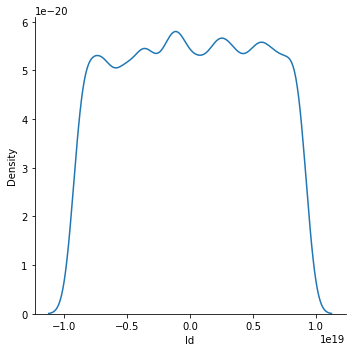

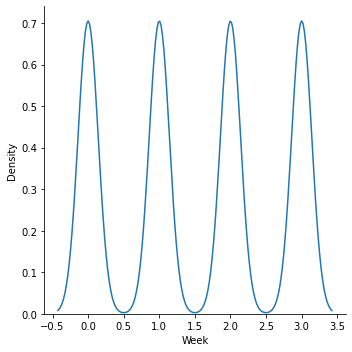

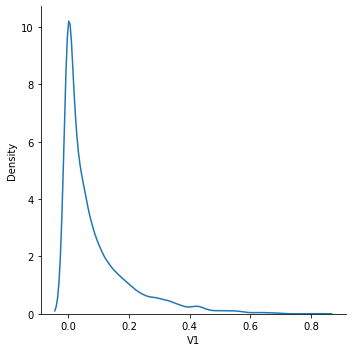

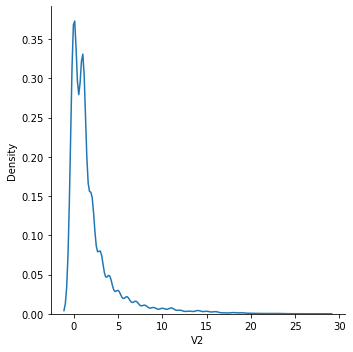

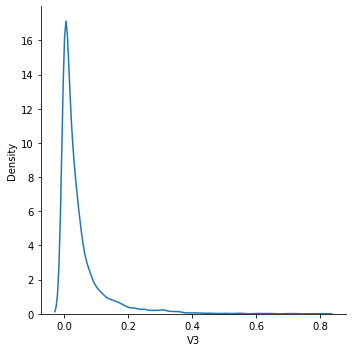

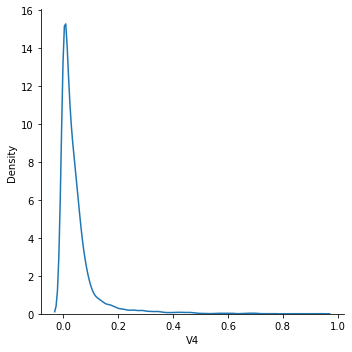

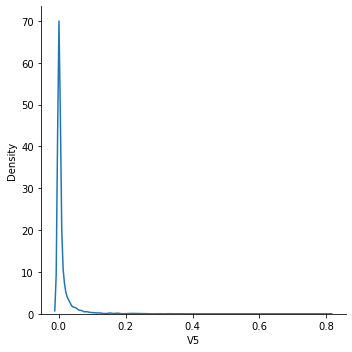

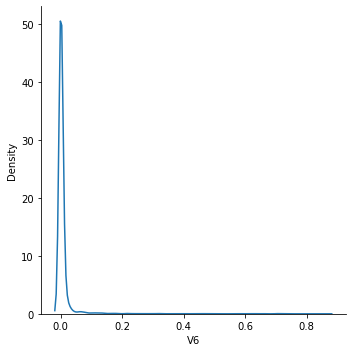

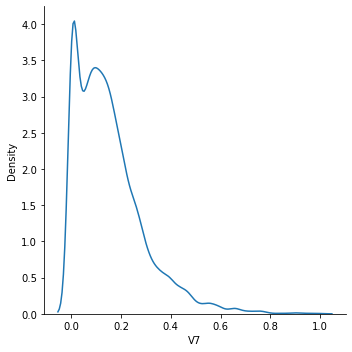

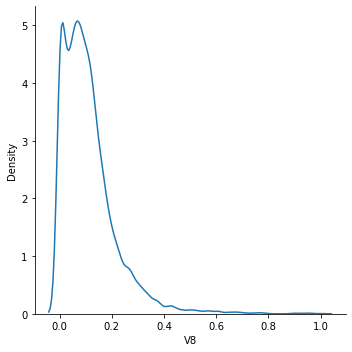

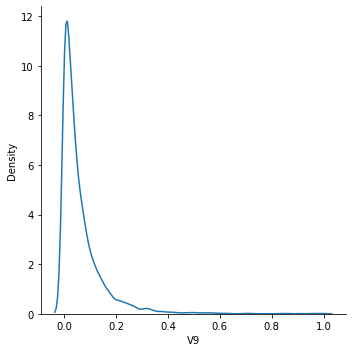

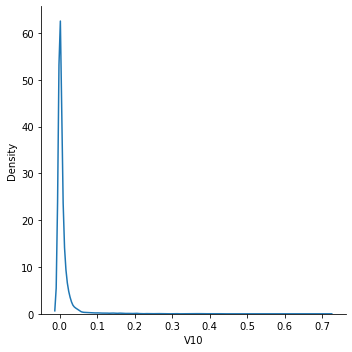

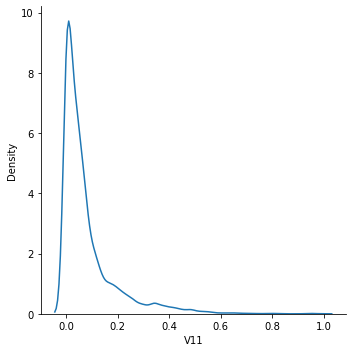

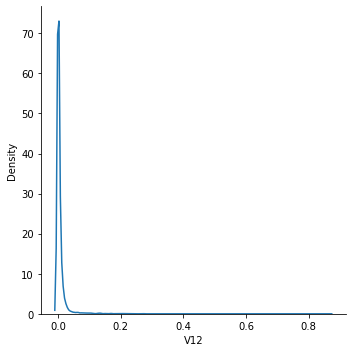

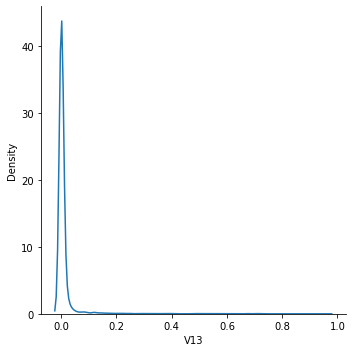

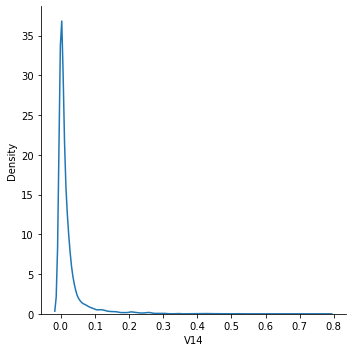

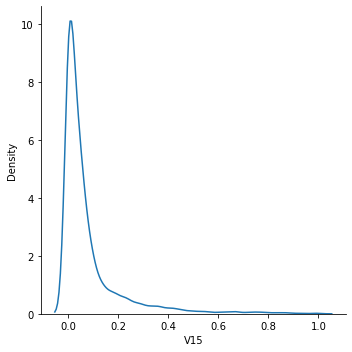

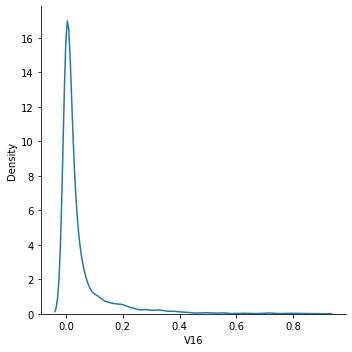

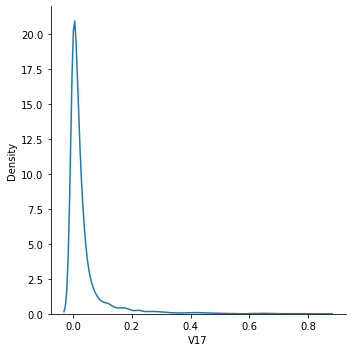

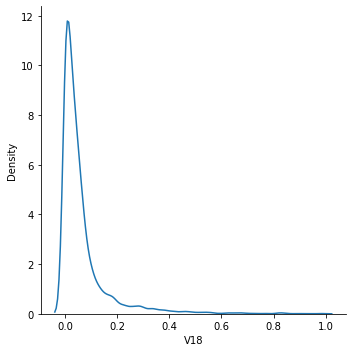

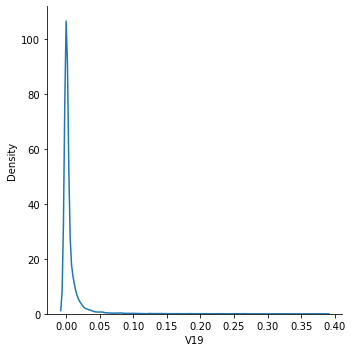

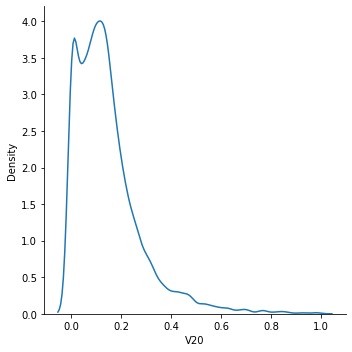

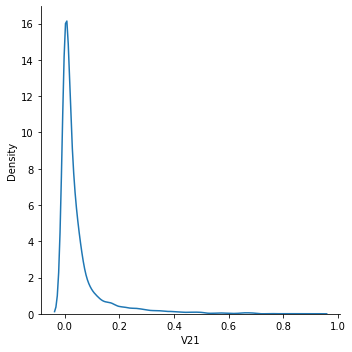

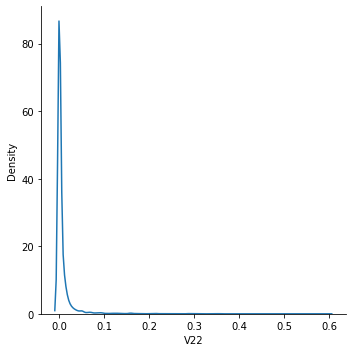

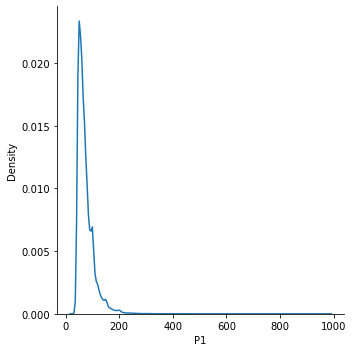

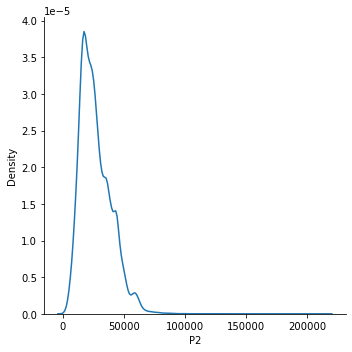

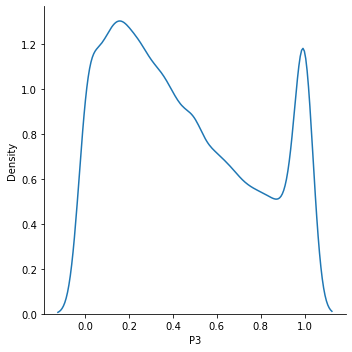

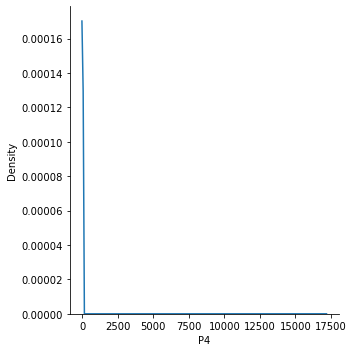

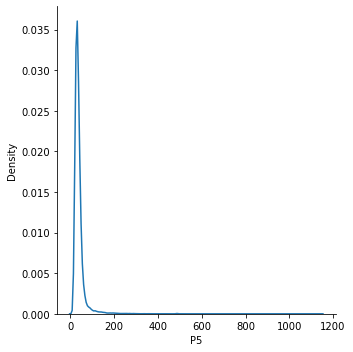

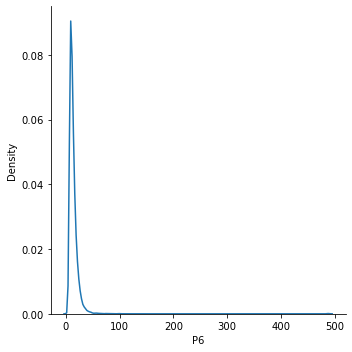

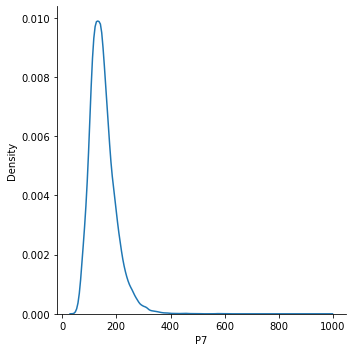

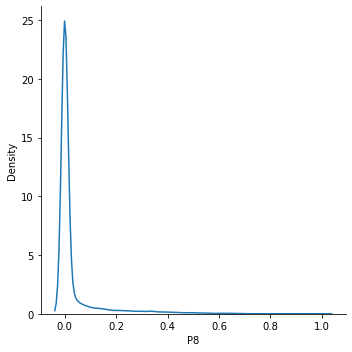

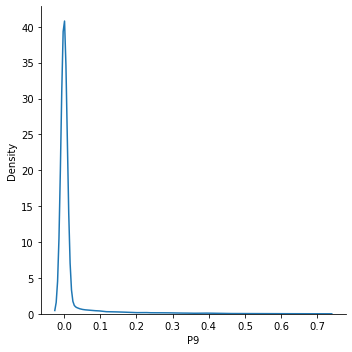

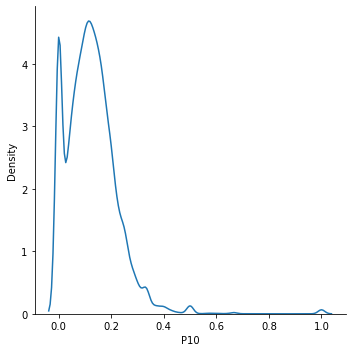

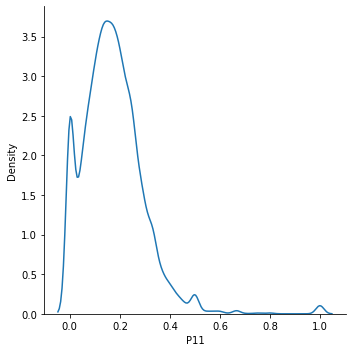

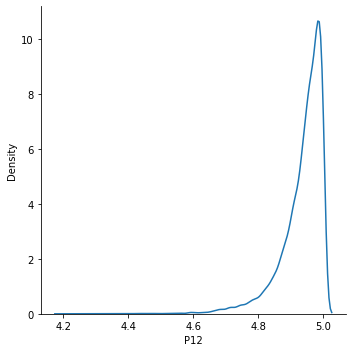

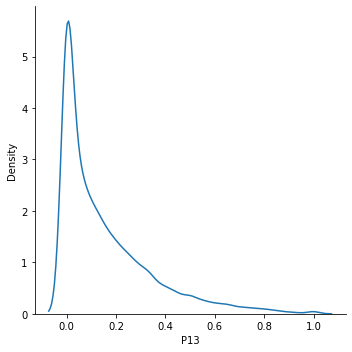

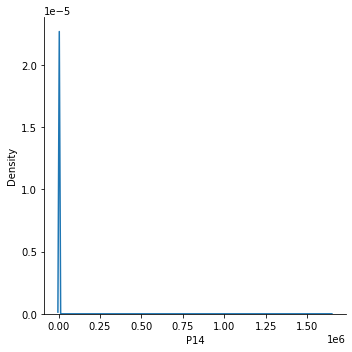

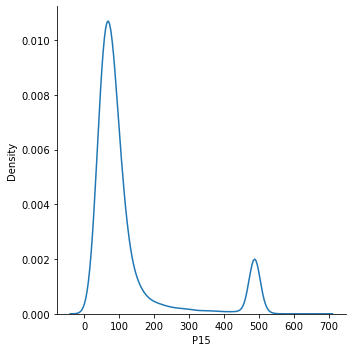

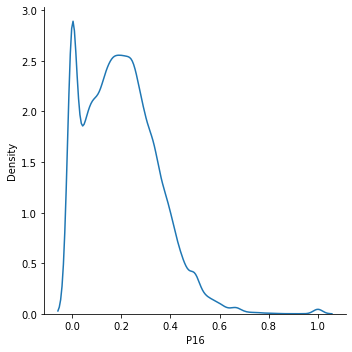

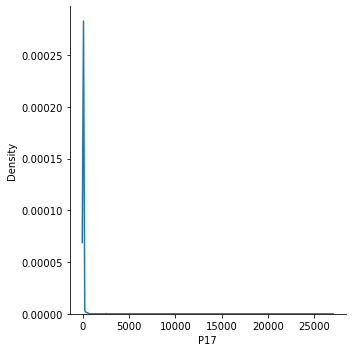

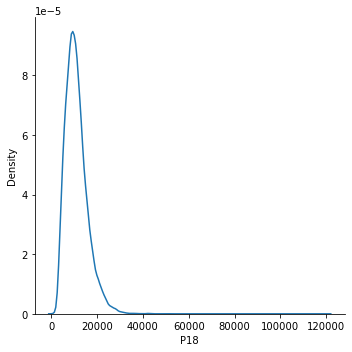

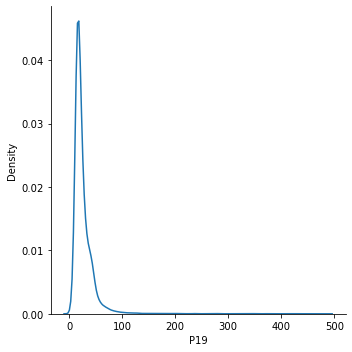

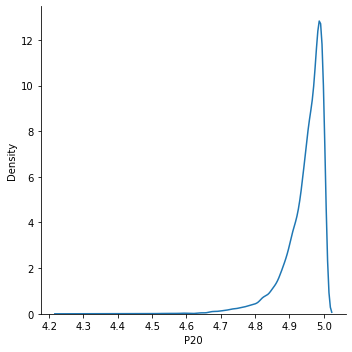

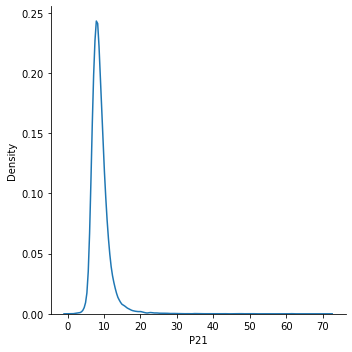

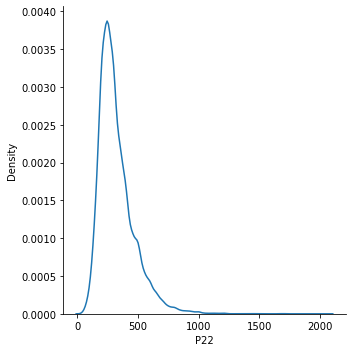

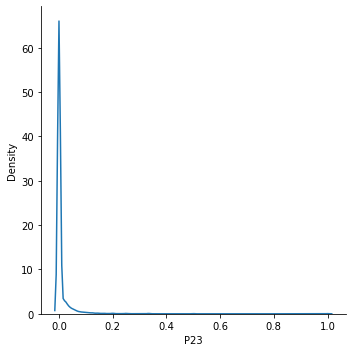

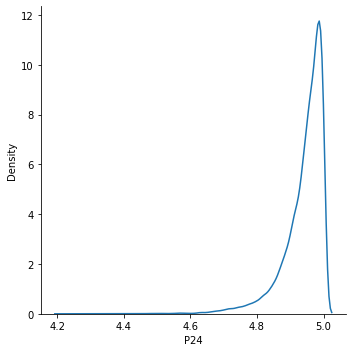

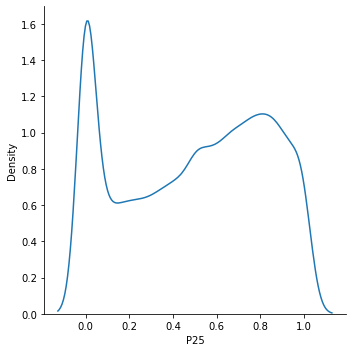

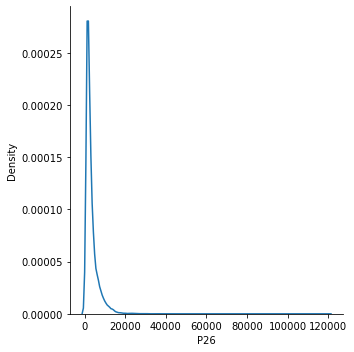

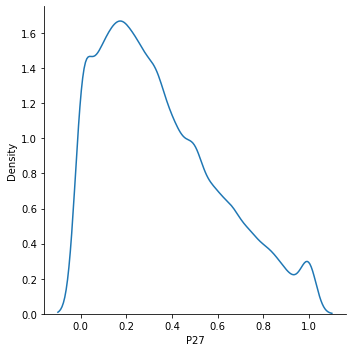

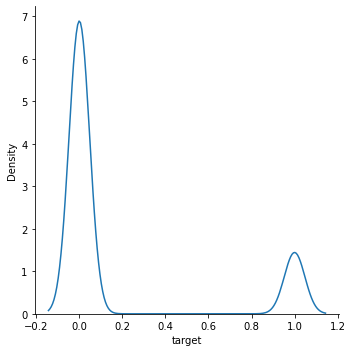

In [17]:
for i in range(len(train_data.columns)):
    sns.displot(train_data[train_data.columns[i]], kind="kde")
    plt.show()


На розподіли id, week, target дивитися сенсу немає - категоріальні дані

Щодо інших величин:

Усі V-номер величини - зсунуті вліво (right skewed)

P3 - двомодальний закон розподілу

P4, P14, P17, P23(?) - можливо, категорія (0, 1), як видно з графіку

P10, P11, P15, P16, P25 - двомодальні зсунуті вліво

P12, P20, P24 - зсунуті вправо (left skewed)

Усі інші P-номер - зсунуті вліво одномодально розподілені величини

In [18]:

for col in train_data.columns[2:-1]:
    print("CV of ", col, " - ",np.std(train_data[col])/np.mean(train_data[col])*100)

CV of  V1  -  135.78585624231215
CV of  V2  -  154.51565349018142
CV of  V3  -  162.09473608795713
CV of  V4  -  172.3012666577315
CV of  V5  -  302.35200392399054
CV of  V6  -  592.6121722800476
CV of  V7  -  89.37175251258567
CV of  V8  -  94.25458712807577
CV of  V9  -  140.4821878765049
CV of  V10  -  360.6649685207425
CV of  V11  -  137.99722584749225
CV of  V12  -  438.6873665877838
CV of  V13  -  554.1939214892338
CV of  V14  -  216.11198114854133
CV of  V15  -  167.3062990283873
CV of  V16  -  202.3902952311503
CV of  V17  -  210.6790884544014
CV of  V18  -  161.32638968060803
CV of  V19  -  340.339885304949
CV of  V20  -  91.57218930595134
CV of  V21  -  188.0230585350583
CV of  V22  -  352.9838412365796
CV of  P1  -  43.673468091842075
CV of  P2  -  47.42922865403725
CV of  P3  -  71.42143687049159
CV of  P4  -  2818.2385915419122
CV of  P5  -  70.8620679353973
CV of  P6  -  88.56234886804786
CV of  P7  -  31.99494462008028
CV of  P8  -  292.7904434971387
CV of  P9  -  384.98

P12, P20, P24 мають низький коефіцієнт варіації, тому є сенс не враховувати колонки з низькою величиною CV.

Є сенс видалити у майбутньому ці поля

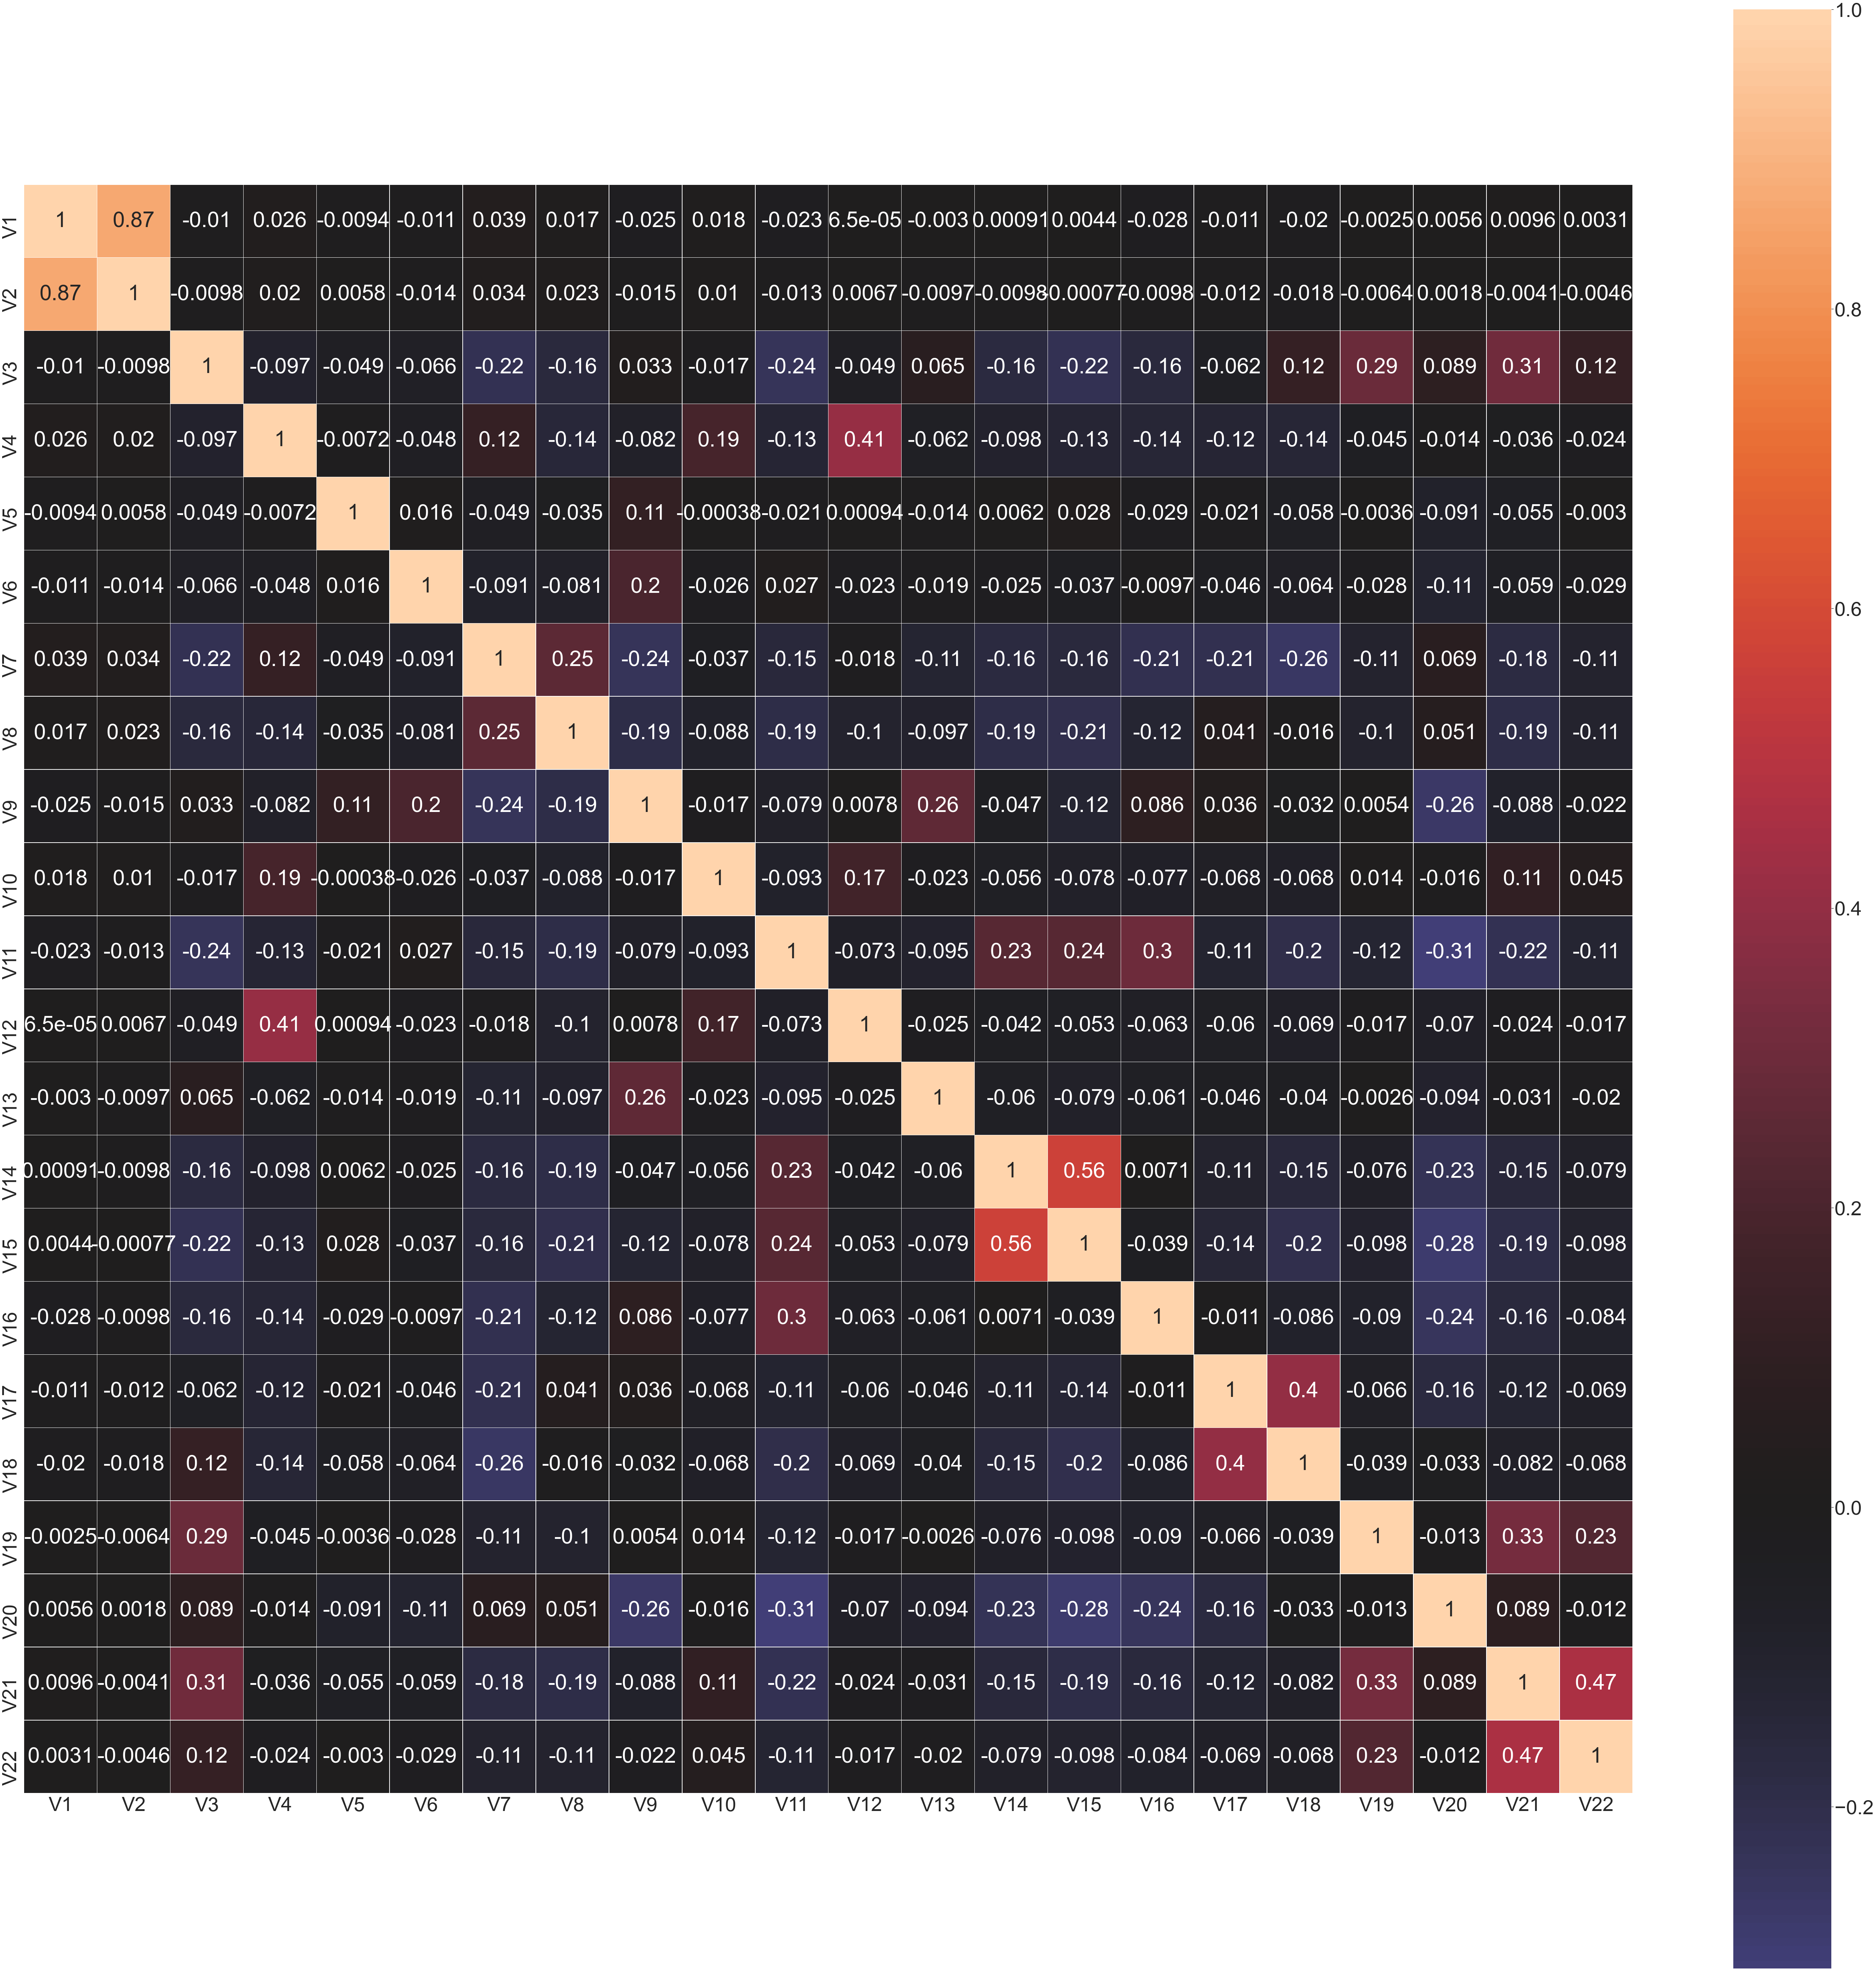

In [19]:
plt.figure(figsize=(100, 100))
sns.set(font_scale=5)

sns.heatmap(train_data[V_indexes].corr(), annot = True, square=True, center=0, linewidths=.5);

V1 і V2 - сильно корелюють між собою ( 0.87 - сильна залежність)

V3,V4,V5 ... V13 - слабко корелюють мфж собою ( абсолюьна величина коефіцієнту кореляції не перевищує 0.5)

V14, V15- позитивна кореляція - 0.54 ( думаю, що можна проігнорувати, або щоб позбутися потенційної проблеми  - додати два поля)

Інші величини слабко корелюють

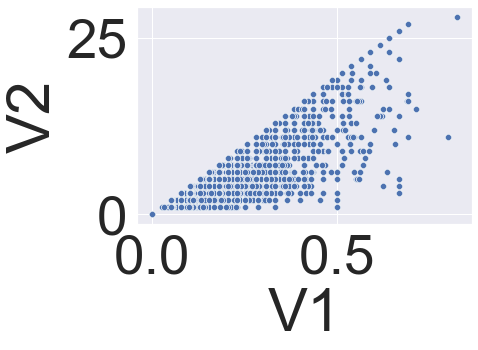

In [20]:
sns.scatterplot(data = train_data, x ='V1', y = 'V2');

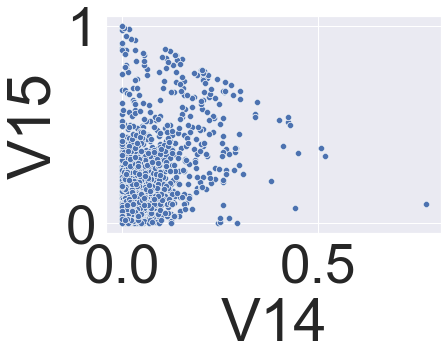

In [21]:
sns.scatterplot(data = train_data, x ='V14', y = 'V15');

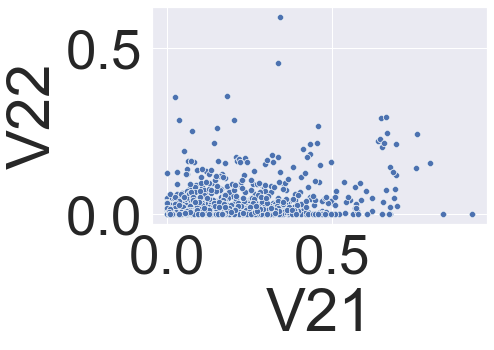

In [22]:
sns.scatterplot(data = train_data, x ='V21', y = 'V22');

In [23]:
plt.figure(figsize=(150, 150))
sns.set(font_scale=6)

sns.heatmap(train_data[P_indexes].corr(), annot = True, square=True, center=0, linewidths=.5);

Кореляція між величинами P1-P27 переважно слабка.

Варто звернути увагу на наступні моменти:

P1, P7  -доволі висока кореляція (0.65)

P1, P26  -аналогічно (0.84)

P1, P27 - аналогічно (0.6)

P2, P18 - позитивна (0.67)

P2, P22 - аналогічно (0.8)

P3, P26 -сильна від'ємна кореляція (-0.88)

P4, P17 - надзвичайно велика кореляція між величинами (0.99 (sic!))

P4, P14 - лінійний зв'язок - пряма пропорційність ( corr = 1)

P5, P15 - позитивний взаємозв'язок (0.61)

P8, P9 - аналогічно (0.68)

P27, P13 - від'ємна кореляція (-0.6) - думаю, що це не сильно значущо

P7, P27  -  додатній зв'язок (0.9)

P19, P21 - сorr = 0.65

P27, P18 - corr = 0.83

Кореляції між іншими величинами в групі - надто малі

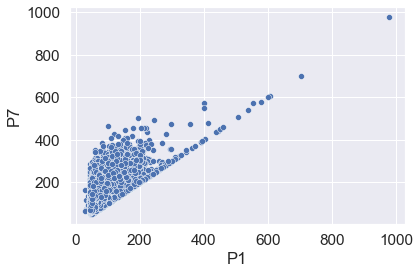

In [24]:
sns.set(font_scale=1.4)
sns.scatterplot(data = train_data, x ='P1', y = 'P7');

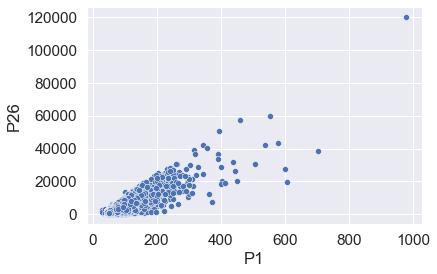

In [25]:
sns.scatterplot(data = train_data, x ='P1', y = 'P26');

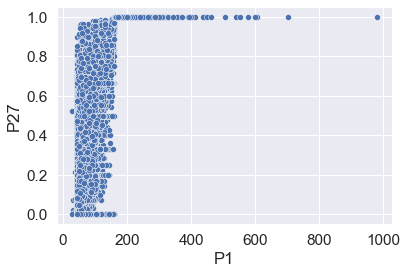

In [26]:
sns.scatterplot(data = train_data, x ='P1', y = 'P27');

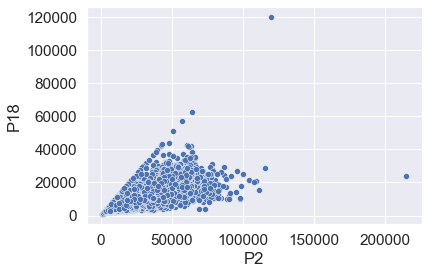

In [27]:
sns.scatterplot(data = train_data, x ='P2', y = 'P18');

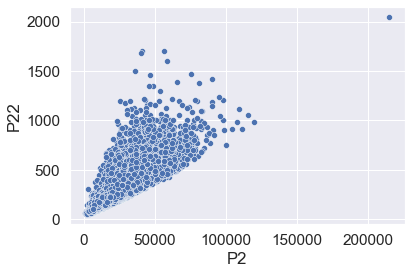

In [28]:
sns.scatterplot(data = train_data, x ='P2', y = 'P22');

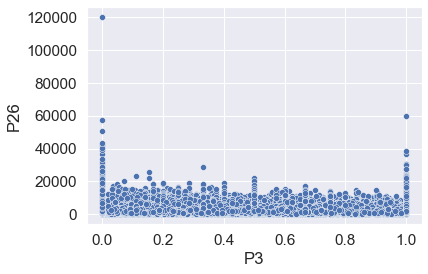

In [29]:
sns.scatterplot(data = train_data, x ='P3', y = 'P26');

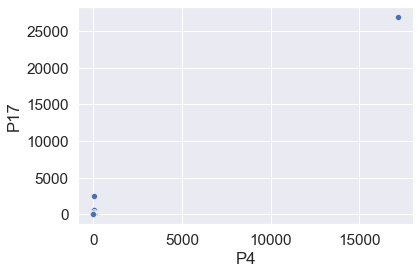

In [30]:
sns.scatterplot(data = train_data, x ='P4', y = 'P17');

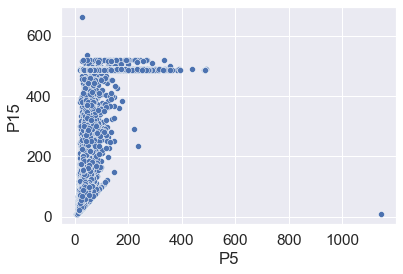

In [31]:
sns.scatterplot(data = train_data, x ='P5', y = 'P15');

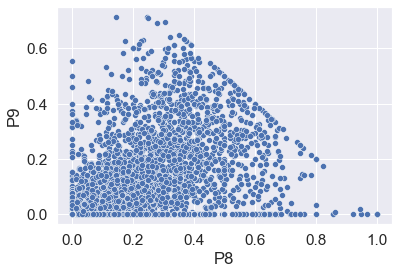

In [32]:
sns.scatterplot(data = train_data, x ='P8', y = 'P9');

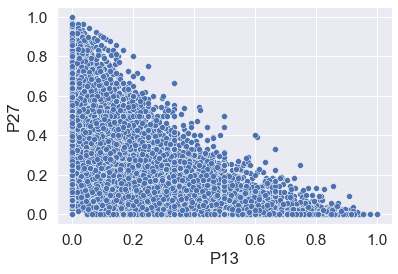

In [33]:
sns.scatterplot(data = train_data, x ='P13', y = 'P27');

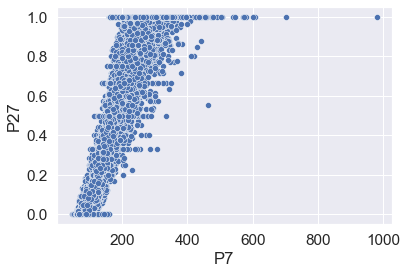

In [34]:
sns.scatterplot(data = train_data, x ='P7', y = 'P27');

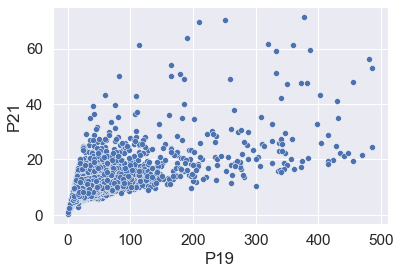

In [35]:
sns.scatterplot(data = train_data, x ='P19', y = 'P21');

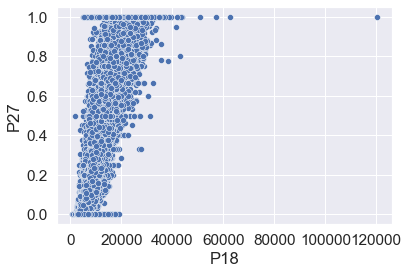

In [36]:
sns.scatterplot(data = train_data, x ='P18', y = 'P27');

Виведемо послідовно кореляцію P1,P2, .... , V1, V2 , ... з target

In [37]:
# Розрахунок кореляції, вважаючи NaN = 0
for col in (V_indexes + P_indexes):
    print("For ", col, " :", np.corrcoef(train_data[col].fillna(0), train_data['target'])[0,1])

For  V1  : 0.09954105531850328
For  V2  : 0.0588425629496368
For  V3  : -0.12865560098852752
For  V4  : -0.1049832490168029
For  V5  : -0.02855258930490821
For  V6  : -0.015266564508346098
For  V7  : -0.18838927289842353
For  V8  : -0.18218706267677048
For  V9  : -0.10689944798276244
For  V10  : -0.025723592898896513
For  V11  : -0.13683973402611443
For  V12  : -0.027330473325689917
For  V13  : -0.036317435319391134
For  V14  : -0.08335191914497946
For  V15  : -0.12203189636773167
For  V16  : -0.10040596297451049
For  V17  : -0.10515895513721725
For  V18  : -0.13681069464450002
For  V19  : -0.07140217365484698
For  V20  : -0.20767001400821858
For  V21  : -0.11499391289493797
For  V22  : -0.05064675804278126
For  P1  : 0.051632052486946564
For  P2  : -0.28760410307286477
For  P3  : -0.07682659201554584
For  P4  : 0.009536987688835026
For  P5  : -0.050443176543846245
For  P6  : 0.09592742233537749
For  P7  : -0.15243688521205315
For  P8  : -0.05600517404945402
For  P9  : -0.0638661620315

V7, V8, V20, P2, P7, P12, P16, P19, P22, P24, P26 мають відносно великий вплив на цільову величину. 

Однак загалом ці велични доволі слабко корелюють 

In [38]:
print("For ID:", np.corrcoef(train_data['Id'].fillna(0), train_data['target'])[0,1])
print("For Week:", np.corrcoef(train_data['Week'].fillna(0), train_data['target'])[0,1])

For ID: 0.0127108270468871
For Week: 1.0629815211939113e-18


Ну, тут ще краще. Абсолютно некорельовані

In [39]:
plt.figure(figsize=(150, 150))
sns.set(font_scale=6)

sns.heatmap(train_data[V_indexes + P_indexes].corr().iloc[0:22,22:49 ], annot = True, square=True, center=0, linewidths=.5);

Між групами V-номер та P-номер значної кореляції не спостерігається (майже всюди вона майже нульова)

Єдине, що V5 корелює з P23

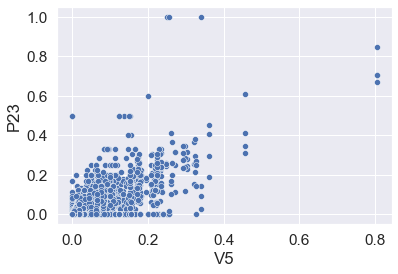

In [40]:
sns.set(font_scale=1.4)
sns.scatterplot(data = train_data, x ='V5', y = 'P23');